# Lab work 1
## Numeric differenciation of a function

### 1. Create a function and take the first and second derivatives

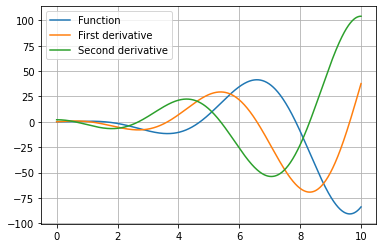

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# create a function
def func(x):
    return x**2 * np.cos(x)

# create a derivative of a function
def first_der(x):
    return 2*x*np.cos(x) - x**2*np.sin(x)

def second_der(x):
    return 2*np.cos(x) - 4*x*np.sin(x) - x**2*np.cos(x)

# make graphics
x = np.linspace(0, 10, 1000)
plt.plot(x, func(x), label = "Function")
plt.plot(x, first_der(x), label = "First derivative")
plt.plot(x, second_der(x), label = "Second derivative")
plt.legend()
plt.grid()
plt.show()

### 2. Make a grid function on the chosen segment with the chosen step between points

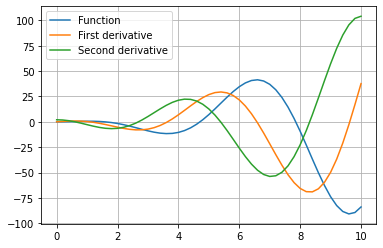

In [73]:
# make a grid
points_num = 50
begin = 0
end = 10
step = (end - begin) / points_num

# make grid functions
x_value = []
grid_func = []
grid_first_der = []
grid_second_der = []

for i in range(points_num + 1):
    x_value.append(i*step)
    grid_func.append(func(i*step))
    grid_first_der.append(first_der(i*step))
    grid_second_der.append(second_der(i*step))

# make graphics of grid functions
plt.plot(x_value, grid_func, label = "Function")
plt.plot(x_value, grid_first_der, label = "First derivative")
plt.plot(x_value, grid_second_der, label = "Second derivative")
plt.legend()
plt.grid()
plt.show()

### 3. Do a first numeric differenciation with the first and second order of accuracy using the following formulas

1) $ f'=\frac{f_{i} - f_{i-1}}{h} $ with accuracy O(h)\
2) $ f'=\frac{f_{i+1} - f_{i-1}}{2h} $ with accuracy O($h^2$)\

Note: values in edges are calculated with using other special formulas

Visualize these fucntions in a graphic form.


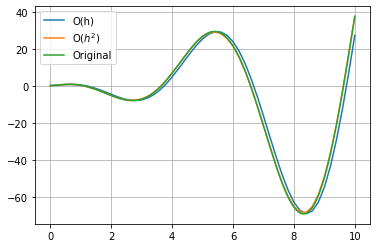

In [79]:
# numerical differentiation
first_der_1 = []
first_der_2 = []

# first derivative with accuracy = O(step)
first_der_1.append((grid_func[1] - grid_func[0])/step) # 0 elem
for i in range(1, points_num + 1):
    first_der_1.append((grid_func[i] - grid_func[i-1])/step)

# first derivative with accuracy = O(step^2)
first_der_2.append((-3*grid_func[0] + 4*grid_func[1] - grid_func[2])/2/step) # 0 elem
for i in range(1, points_num):
    first_der_2.append((grid_func[i+1] - grid_func[i-1])/2/step)
last = points_num
first_der_2.append((3*grid_func[last] - 4*grid_func[last-1] + grid_func[last-2])/2/step) # last elem
    
# make graphics
# note: h = step
plt.plot(x_value, first_der_1, label = "O(h)")
plt.plot(x_value, first_der_2, label = "O($h^2$)")
plt.plot(x, first_der(x), label = "Original")
plt.legend()
plt.grid()
plt.show()


### 4. Count the accuracy of these methods
Let $r$ be an accuracy of the method with chosen step defined as $h$

Make graphics $r(h)$ in a logarithmic scale

O(h): line coeff =  0.9996133312149666
O(h^2): line coeff =  1.999424767862166


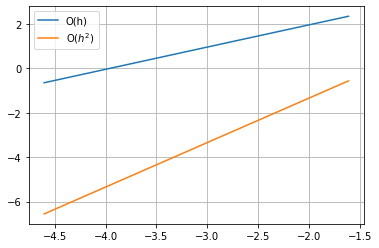

In [88]:
# number of points
num_begin = 50
num_end = 1000

# fill the array of steps
step_array = []
for i in range(num_begin, num_end):
    step_array.append((end - begin) / i)
    
# accuracy arrays
delta_11 = []
delta_12 = []

for num in range(num_begin, num_end):
    cur_step = (end - begin) / num
    
    # firstly fill the array with grid function values
    grid = []
    for i in range(num + 1):
        grid.append(func(i*cur_step))
        
    # then fill the array of derivatives
    first_1 = []
    first_2 = []
    first_1.append((grid[1] - grid[0])/cur_step) # 0 elem
    for i in range(1, num + 1):
        first_1.append((grid[i] - grid[i-1])/cur_step)
        
    first_2.append((-3*grid[0] + 4*grid[1] - grid[2])/2/cur_step) # 0 elem
    for i in range(1, num):
        first_2.append((grid[i+1] - grid[i-1])/2/cur_step)
    first_2.append((3*grid[num] - 4*grid[num-1] + grid[num-2])/2/cur_step) # last elem
    
        
    # finally find the max difference between grid 
    # and real values of derivative in the point
    max1 = 0
    max2 = 0
    for i in range(num + 1):
        r1 = abs(first_der(i*cur_step) - first_1[i])
        if r1 > max1:
            max1 = r1
        r2 = abs(first_der(i*cur_step) - first_2[i]) 
        if r2 > max2:
            max2 = r2
    
    # remember the result
    delta_11.append(max1)
    delta_12.append(max2)
    
# make an approximation with a line
step_array = np.log(step_array)
delta_11 = np.log(delta_11)
delta_12 = np.log(delta_12)
a1, b1 = np.polyfit(step_array, delta_11, 1)
a2, b2 = np.polyfit(step_array, delta_12, 1)
print("O(h): line coeff = ", a1)
print("O(h^2): line coeff = ", a2)
            
# make a graphic in logarithmic scale
plt.plot(step_array, delta_11, label = "O(h)")
plt.plot(step_array, delta_12, label = "O($h^2$)")
plt.legend()
plt.grid()
plt.show()

How one can see, line coefficients coincide with the theoretical.

### 5. Do a second numeric differenciation with the second order of accuracy using the following formula
$ f'' = \frac{f_{i+1} - 2f_{i} + f_{i-1}}{h^2} $

Note: values in edges are calculated with using other special formulas

Visualize this fucntion in a graphic form.

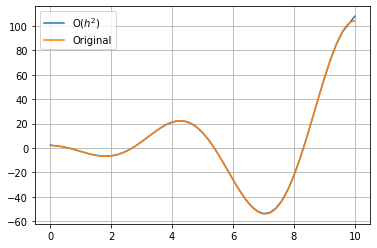

In [86]:
# numerical differentiation
second_der_2 = []

# second derivative with accuracy = O(step^2)
second_der_2.append((2*grid_func[0] - 5*grid_func[1] + 4*grid_func[2] - grid_func[3])/step/step) # 0 elem
for i in range(1, points_num):
    second_der_2.append((grid_func[i+1] - 2*grid_func[i] + grid_func[i-1])/step/step)
last = points_num
second_der_2.append((2*grid_func[last] - 5*grid_func[last-1] + 4*grid_func[last-2] - grid_func[last-3])/step/step) # last elem
    
# make graphics
plt.plot(x_value, second_der_2, label = "O($h^2$)")
plt.plot(x, second_der(x), label = "Original")
plt.legend()
plt.grid()
plt.show()

### 6. Count the accuracy of this method
Let $r$ be an accuracy of the method with chosen step defined as $h$

Make a graphic $r(h)$ in a logarithmic scale

O(h^2): line coeff =  1.9824430567032427


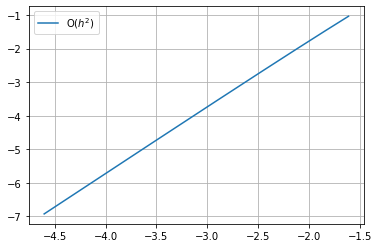

In [85]:
# accuracy array
delta_22 = []

for num in range(num_begin, num_end):
    cur_step = (end - begin) / num
    
    # firstly fill the array with grid function values
    grid = []
    for i in range(num + 1):
        grid.append(func(i*cur_step))
        
    # then fill the array of derivatives
    second_2 = []
    second_2.append((2*grid[0] - 5*grid[1] + 4*grid[2] - grid[3])/cur_step/cur_step) # 0 elem
    for i in range(1, num):
        second_2.append((grid[i+1] - 2*grid[i] + grid[i-1])/cur_step/cur_step)
    second_2.append((2*grid[num] - 5*grid[num-1] + 4*grid[num-2] - grid[num-3])/cur_step/cur_step) # last elem
    
        
    # finally find the max difference between grid 
    # and real values of derivative in the point
    max = 0
    for i in range(1, num):
        r = abs(second_der(i*cur_step) - second_2[i])
        if r > max:
            max = r
    
    # remember the result
    delta_22.append(max)
    
# make an approximation with a line
delta_22 = np.log(delta_22)
a, b = np.polyfit(step_array, delta_22, 1)
print("O(h^2): line coeff = ", a)
            
# make a graphic in logarithmic scale
plt.plot(step_array, delta_22, label = "O($h^2$)")
plt.legend()
plt.grid()
plt.show()

How one can see, line coefficient coincides with the theoretical.